In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [113]:
df = pd.read_csv("419JourneyDataExtract01May2025-14May2025.csv")
df.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,148598720,2025/5/14 23:59,1171,"New Road 1 , Whitechapel",2025/5/15 0:15,300049,"Aylward Street, Stepney",54155,CLASSIC,16m 24s,984753
1,148598719,2025/5/14 23:59,300012,"Irene Road, Parsons Green",2025/5/15 0:07,300009,"World's End Place, West Chelsea",59440,CLASSIC,8m 1s,481941
2,148598718,2025/5/14 23:59,3426,"Lansdowne Drive, Hackney Central",2025/5/15 0:32,2633,"Palace Gardens Terrace, Notting Hill",63379,PBSC_EBIKE,32m 43s,1963655
3,148598717,2025/5/14 23:58,3477,"Porchester Place, Paddington",2025/5/15 0:07,1128,"Westbourne Green, Westbourne",62327,PBSC_EBIKE,8m 13s,493032
4,148598716,2025/5/14 23:58,970,"Scala Street, Fitzrovia",2025/5/15 0:04,3470,"Great Percy Street, Clerkenwell",62080,PBSC_EBIKE,6m 32s,392676


In [114]:
df["Start date"] = pd.to_datetime(df["Start date"], errors="coerce")
df["End date"] = pd.to_datetime(df["End date"], errors="coerce")

In [115]:
df = df.dropna(subset=["Start date", "End date"])

In [116]:
df["duration_min"] = df["Total duration (ms)"] / 1000 / 60

In [117]:
df = df[df["duration_min"] > 0]
df = df[df["duration_min"] < 120]

In [118]:
df["Start station"] = df["Start station"].fillna("Unknown")
df["End station"] = df["End station"].fillna("Unknown")

In [119]:
df = df.reset_index(drop=True)
df.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),duration_min
0,148598720,2025-05-14 23:59:00,1171,"New Road 1 , Whitechapel",2025-05-15 00:15:00,300049,"Aylward Street, Stepney",54155,CLASSIC,16m 24s,984753,16.412550
1,148598719,2025-05-14 23:59:00,300012,"Irene Road, Parsons Green",2025-05-15 00:07:00,300009,"World's End Place, West Chelsea",59440,CLASSIC,8m 1s,481941,8.032350
2,148598718,2025-05-14 23:59:00,3426,"Lansdowne Drive, Hackney Central",2025-05-15 00:32:00,2633,"Palace Gardens Terrace, Notting Hill",63379,PBSC_EBIKE,32m 43s,1963655,32.727583
3,148598717,2025-05-14 23:58:00,3477,"Porchester Place, Paddington",2025-05-15 00:07:00,1128,"Westbourne Green, Westbourne",62327,PBSC_EBIKE,8m 13s,493032,8.217200
4,148598716,2025-05-14 23:58:00,970,"Scala Street, Fitzrovia",2025-05-15 00:04:00,3470,"Great Percy Street, Clerkenwell",62080,PBSC_EBIKE,6m 32s,392676,6.544600


In [120]:
duration_mean = df["duration_min"].mean()
duration_median = df["duration_min"].median()
duration_std = df["duration_min"].std()

print("Mean duration (min):", duration_mean)
print("Median duration (min):", duration_median)
print("Standard deviation:", duration_std)

Mean duration (min): 17.234752233575062
Median duration (min): 13.656216666666666
Standard deviation: 13.956867941535524


In [121]:
df.describe()

,Number,Start date,Start station number,End date,End station number,Bike number,Total duration (ms),duration_min
count,4.012700e+05,401270,4.012700e+05,401270,4.012700e+05,401270.000000,4.012700e+05,401270.000000
mean,1.483917e+08,2025-05-08 06:46:52.657413120,1.037964e+05,2025-05-08 07:04:06.751961856,1.032075e+05,52341.356052,1.034085e+06,17.234752
min,1.481849e+08,2025-05-01 00:00:00,9.590000e+02,2025-05-01 00:01:00,9.590000e+02,2.000000,9.990000e+02,0.016650
25%,1.482887e+08,2025-05-04 13:12:00,1.124000e+03,2025-05-04 13:34:00,1.123000e+03,51702.000000,4.728060e+05,7.880100
50%,1.483914e+08,2025-05-08 11:52:00,3.464000e+03,2025-05-08 12:07:00,3.461000e+03,55353.000000,8.193730e+05,13.656217
75%,1.484952e+08,2025-05-11 20:22:00,2.001760e+05,2025-05-11 20:41:00,2.001760e+05,58901.000000,1.331630e+06,22.193825
max,1.485987e+08,2025-05-14 23:59:00,1.085444e+06,2025-05-15 00:48:00,1.085444e+06,63550.000000,7.198808e+06,119.980133
std,1.193698e+05,NaN,1.289608e+05,NaN,1.288827e+05,10784.290788,8.374121e+05,13.956868


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401270 entries, 0 to 401269
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Number                401270 non-null  int64         
 1   Start date            401270 non-null  datetime64[ns]
 2   Start station number  401270 non-null  int64         
 3   Start station         401270 non-null  object        
 4   End date              401270 non-null  datetime64[ns]
 5   End station number    401270 non-null  int64         
 6   End station           401270 non-null  object        
 7   Bike number           401270 non-null  int64         
 8   Bike model            401270 non-null  object        
 9   Total duration        401270 non-null  object        
 10  Total duration (ms)   401270 non-null  int64         
 11  duration_min          401270 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memo

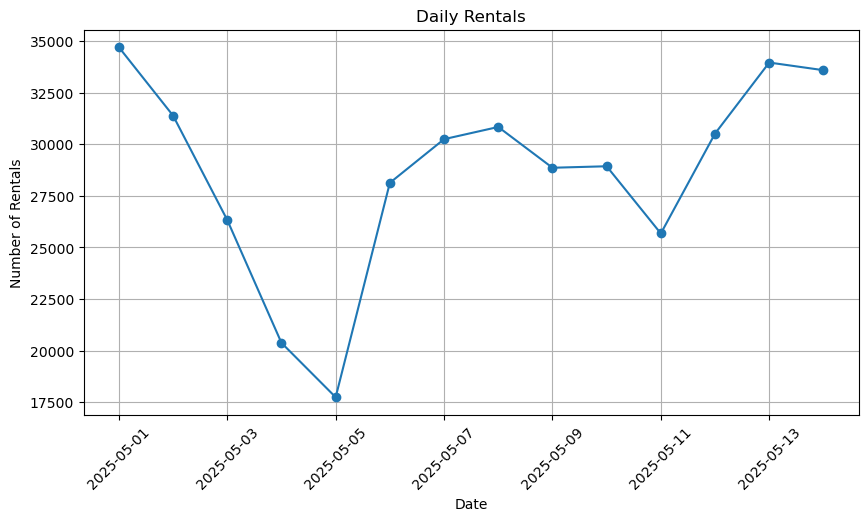

In [123]:
daily_rentals = df.groupby(df["Start date"].dt.date).size()

plt.figure(figsize=(10,5))
plt.plot(daily_rentals.index, daily_rentals.values, marker='o')
plt.title("Daily Rentals")
plt.xlabel("Date")
plt.ylabel("Number of Rentals")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

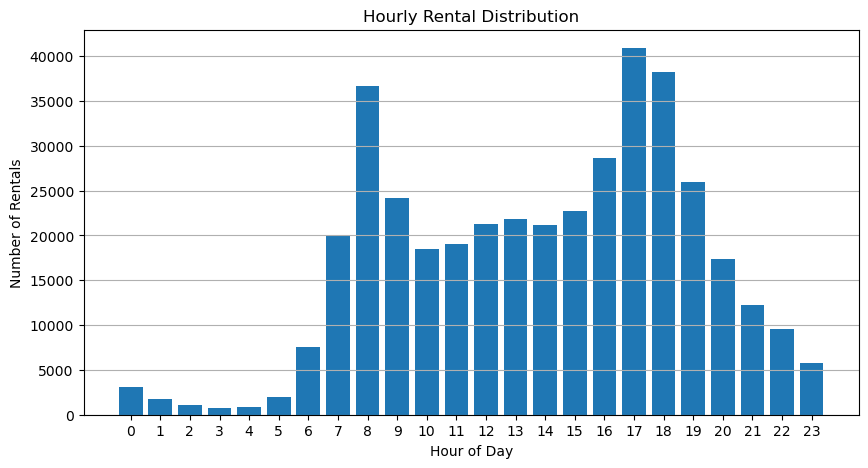

In [124]:
hourly_rentals = df.groupby(df["Start date"].dt.hour).size()

plt.figure(figsize=(10,5))
plt.bar(hourly_rentals.index, hourly_rentals.values)
plt.title("Hourly Rental Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rentals")
plt.xticks(range(0,24))
plt.grid(axis='y')
plt.show()

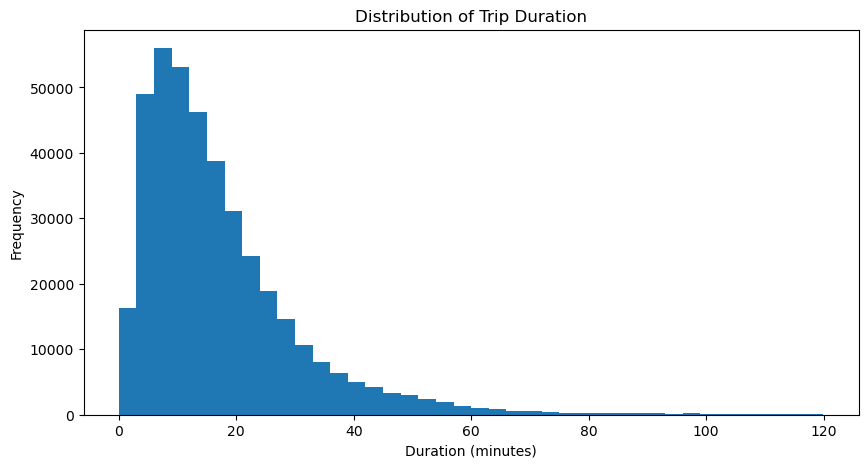

In [125]:
plt.figure(figsize=(10,5))
plt.hist(df["duration_min"], bins=40)
plt.title("Distribution of Trip Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

In [126]:
import statsmodels.api as sm

In [127]:
hourly_rentals = df.groupby(df["Start date"].dt.hour).size().reset_index(name="rentals")
hourly_rentals.rename(columns={"Start date":"hour"}, inplace=True)

In [128]:
X = sm.add_constant(hourly_rentals["hour"])
y = hourly_rentals["rentals"]  
model = sm.OLS(y, X).fit()

In [129]:
model.rsquared

np.float64(0.22716041474410054)

In [130]:
actual_mean = hourly.groupby("hour")["rentals"].mean()
hourly["predicted"] = model.predict(X)
pred_mean = hourly.groupby("hour")["predicted"].mean()


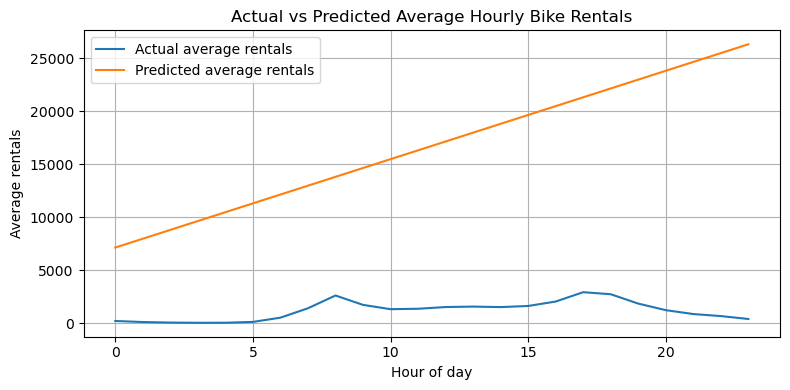

In [131]:
plt.figure(figsize=(8, 4))
plt.plot(actual_mean.index, actual_mean.values, label="Actual average rentals")
plt.plot(pred_mean.index, pred_mean.values, label="Predicted average rentals")

plt.xlabel("Hour of day")
plt.ylabel("Average rentals")
plt.title("Actual vs Predicted Average Hourly Bike Rentals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [132]:
avg_hourly["Predicted"] = model.predict(X)

In [133]:
avg_hourly.to_csv("hourly_predictions_avg.csv", index=False)